# Fauvet Field

**-Reference:** [Fauvet et al. (2012)](https://arxiv.org/abs/1201.5742) 

**-Orignal Implementation:** Hammurabi (old) [(code](https://sourceforge.net/projects/hammurabicode/), [paper)](https://arxiv.org/abs/0807.2262)

**-Default parameters constrained using (see reference publication):** simulated *Planck* data

In [1]:
import ImagineModels as img
from plotting_helpers import plot_slice


#### 1. Visualizing the model

In [2]:
model = img.FauvetMagneticField()
shape = [100, 100, 20] # necessarily a list of 3 ints! 
increment = [.20, .20, .20]  
refpoint = [-10., -10., -2.]
vmax = 5
vmin = -5 

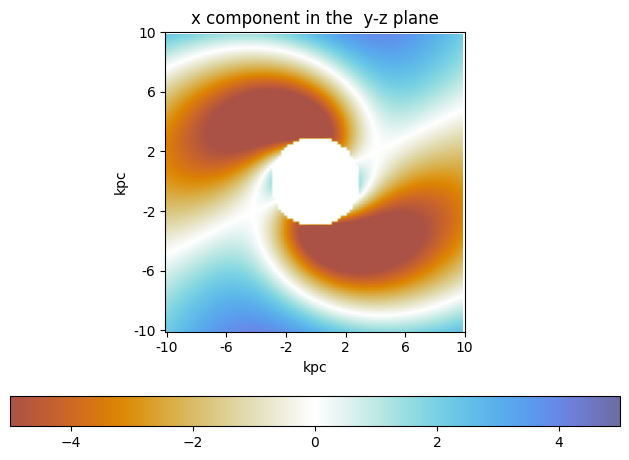

In [3]:
model_on_grid = model.on_grid(shape=shape, reference_point=refpoint, increment=increment)
plot_slice(model_on_grid, 0, 2, shape, refpoint, increment, vmin, vmax)

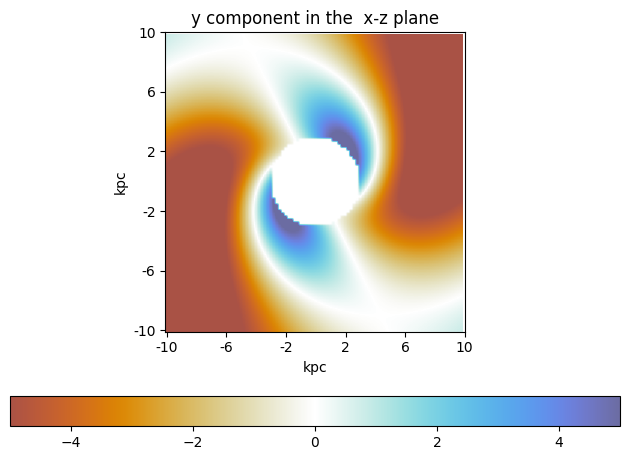

In [4]:
plot_slice(model_on_grid, 1, 2, shape, refpoint, increment, vmin, vmax)

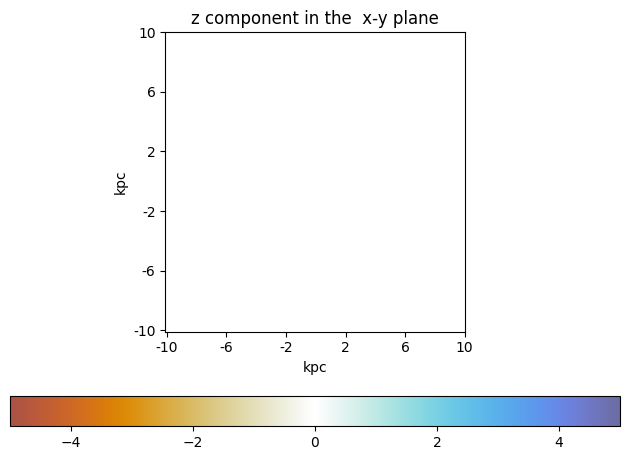

In [5]:
plot_slice(model_on_grid, 2, 2, shape, refpoint, increment, vmin, vmax)

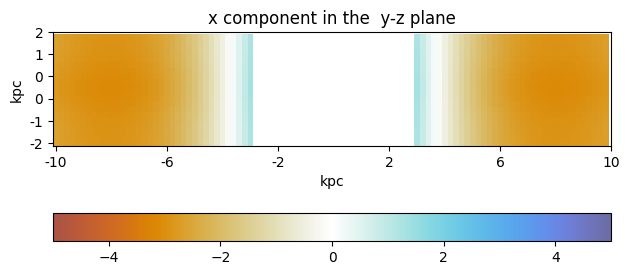

In [6]:
plot_slice(model_on_grid, 0, 1, shape, refpoint, increment, vmin, vmax)

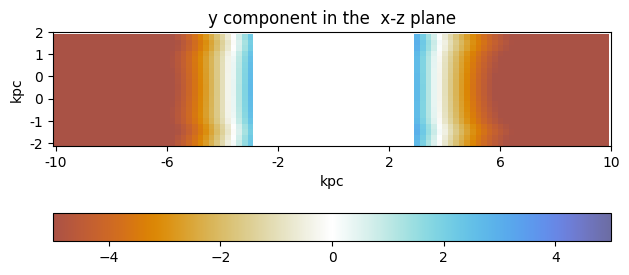

In [7]:
plot_slice(model_on_grid, 1, 1, shape, refpoint, increment, vmin, vmax)

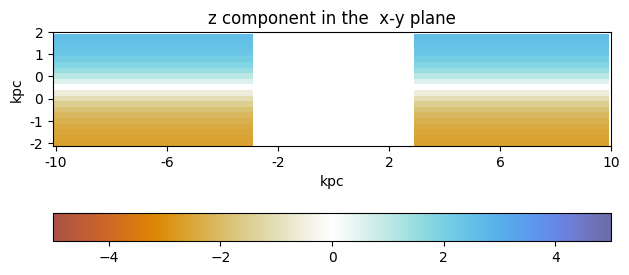

In [8]:
plot_slice(model_on_grid, 2, 1, shape, refpoint, increment, vmin, vmax)

### 2. The parameters

**TBD**